In [3]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!pip install nx

--2025-09-08 20:30:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-08 20:30:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-08 20:30:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [4]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [5]:
import numpy as np
import pandas as pd
import ast
from sklearn.metrics.pairwise import cosine_similarity

word_to_embeddings = dict()

with open('glove.6B.50d.txt') as f:
  for line in f:
    word = line.split()[0]
    embeddings = np.asarray(line.split()[1:], dtype='float32')
    #embeddings_reduced = embeddings[0:25]
    #embeddings_reduced = embeddings[25:]
    #print(len(embeddings_reduced))
    #np. asarry -> to dict / dataframe loc iloc
    word_to_embeddings[word] = embeddings

w = word_to_embeddings

In [10]:
import json

file1 = open('content.txt', 'r')

text_names = file1.read().splitlines()
files_vector = dict()

for curr_text in text_names:
  if '.rtf' in curr_text or 'content.txt' in curr_text:
    continue
  try:
    # Safely parse the string representation of the list using json.loads
    tags_str = curr_text.split(".")[0]
    # Ensure the string is a valid JSON list representation
    if tags_str.startswith('[') and tags_str.endswith(']'):
      tags = json.loads(tags_str)
    else:
      print(f"Skipping invalid tag format: {tags_str}")
      continue
  except (json.JSONDecodeError, IndexError) as e:
    print(f"Skipping line due to error parsing tags: {curr_text} - {e}")
    continue

  # Ensure all tags are strings before attempting to get embeddings
  valid_tags = [tag for tag in tags if isinstance(tag, str)]
  if not valid_tags:
    print(f"Skipping line as no valid string tags found: {curr_text}")
    continue

  # Calculate the sum of embeddings for valid tags
  tag_embeddings = [w.get(tag, np.zeros(50, dtype='float32')) for tag in valid_tags]
  files_vector[curr_text] = sum(tag_embeddings)


files_similarity_matrix = pd.DataFrame(columns=files_vector.keys(), index=files_vector.keys())

for text_1 in files_vector.keys():
  for text_2 in files_vector.keys():
    if text_1 in text_2:
      similarity = 0
    else:
      vec_1 = files_vector[text_1]
      vec_2 = files_vector[text_2]
      # Ensure vectors are not zero vectors before calculating cosine similarity
      if np.sum(vec_1) == 0 or np.sum(vec_2) == 0:
          similarity = 0
      else:
          similarity = cosine_similarity([vec_1], [vec_2])[0][0]

    files_similarity_matrix.loc[text_1, text_2] = similarity

display(files_similarity_matrix) # Display the resulting matrix

Skipping line due to error parsing tags: ['amtshaus', 'modernism', 'reformation', 'entropy', 'corbusier'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['amtshaus, 'modernism', 'continuity', 'proportion', 'values'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['art', 'continuity', 'rupture', 'modernlife', 'history'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['artist', 'dandy', 'baudelaire', 'flaneur', 'ephemeral'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['artist', 'socialclass', 'crowd', 'flaneur', 'time'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['dandy', love', 'blasé', 'impression', 'identity'].txt - Expecting value: line 1 column 2 (char 1)
Skipping line due to error parsing tags: ['dandy', modernity', 'simplicity', 'artist', 'distinction'].txt - Expecti

""


In [11]:
temp_matrix = files_similarity_matrix.copy()

# choose starting file
next = "['broken', 'crowded', 'reflection', 'social', 'woman'].jpeg"

# if 1st = text activ:
#reader = open(next).read()
# if 1st = image activ:
reader = "INSERT IMAGE!" + next + "\n"

#if '.jpeg' in text_1 or '.png' in text_1 or '.jpg' in text_1:
#reader = open(next)
#else:
#reader = open(next).read()

while (len(temp_matrix.columns) > 1):
  text_1 = next
  text_2 = temp_matrix.columns[np.argmax(temp_matrix.loc[text_1,])]
  if '.txt' in text_2:
    reader = reader + '\n' + '--------Similarity: ' + str(temp_matrix.loc[text_1, text_2]) + '\n' + open(text_2, encoding='utf-8').read()
  else:
    reader = reader + '\n' + '--------Similarity: ' + str(temp_matrix.loc[text_1, text_2]) + '\n' + "INSERT IMAGE!" + text_2
  temp_matrix = temp_matrix.drop(text_1, axis=0)
  temp_matrix = temp_matrix.drop(text_1, axis=1)
  next = text_2


print(reader)

INSERT IMAGE!['broken', 'crowded', 'reflection', 'social', 'woman'].jpeg



In [ ]:
files_similarity_matrix

,"['diversity', 'genuineness', 'dionysian', 'derealization', 'animalistic'].png","['ephemeral', 'absurd', 'reflective', 'anemoia', 'reconciliation'].jpeg","['melancholic', 'obscure', 'familiar', 'solastalgia', 'fernweh'].jpeg","['tranquility', 'anonimity', 'voyeurism', 'public', 'daydreaming'].png","['scarfing', 'foodbeard', 'forever', 'cream', 'dairy'].jpeg","['testosterone', 'foxes', 'tail', 'communication', 'territory'].jpeg","['disobedience', 'advance', 'community', 'festivity', 'epicenter'].jpeg","['prodigy', 'touch', 'multiplicity', 'viewpoint', 'struggle'].jpeg","['family', 'conspiracy', 'improvement', 'independence', 'dawn'].jpeg","['serenity', 'concentration', 'harmony', 'genuine', 'eccentric', 'outcast'].jpeg",...,"['dilemma', 'guilt', 'retreat', 'magical realism', 'detachment'].jpeg","['exquisiteness', 'texture', 'variety', 'contextual flexibility', 'nostalgia'].png","['old school', 'political', 'subversion', 'stranger', 'discrimination'].jpeg","['pilgrimage', 'heat trap', 'paradise', 'familiarity', 'timeless'].png","['central', 'childhood', 'floating', 'nest', 'fading'].jpeg","['nourishing', 'unlimited', 'mindmaze', 'admiration', 'excitement'].jpeg","['atemporal', 'slowness', 'enveloping', 'process', 'flow'].jpg","['expression', 'atypical', 'organic', 'industrial', 'self'].jpeg","['powerful', 'volume', 'comfort', 'imaginary', 'bold'].jpeg","['refuge', 'femininity', 'critique', 'domesticity', 'ignorance'].jpeg"
"['diversity', 'genuineness', 'dionysian', 'derealization', 'animalistic'].png",0,0.428378,0.334861,0.545392,0.010089,0.063933,0.227697,0.372742,-0.056329,0.5288,...,0.212837,0.385274,0.176761,0.402571,0.001388,0.560276,0.286209,0.235044,0.158085,0.540643
"['ephemeral', 'absurd', 'reflective', 'anemoia', 'reconciliation'].jpeg",0.428378,0,0.675689,0.478627,0.242119,0.306099,0.498335,0.59324,0.47569,0.706269,...,0.517698,0.668782,0.582843,0.563237,0.404986,0.590255,0.62754,0.631603,0.595255,0.714851
"['melancholic', 'obscure', 'familiar', 'solastalgia', 'fernweh'].jpeg",0.334861,0.675689,0,0.317855,0.297042,0.320154,0.294028,0.665529,0.377656,0.628285,...,0.492182,0.743446,0.431143,0.55634,0.453926,0.399476,0.381072,0.590124,0.666432,0.5305
"['tranquility', 'anonimity', 'voyeurism', 'public', 'daydreaming'].png",0.545392,0.478627,0.317855,0,-0.00449,0.112561,0.399199,0.33923,0.234178,0.556817,...,0.437457,0.276678,0.389604,0.440014,0.236971,0.483366,0.444109,0.337579,0.203612,0.548218
"['scarfing', 'foodbeard', 'forever', 'cream', 'dairy'].jpeg",0.010089,0.242119,0.297042,-0.00449,0,0.346828,0.104757,0.256445,0.317328,0.280825,...,0.162429,0.539938,0.214955,0.249222,0.469814,0.308961,0.242839,0.453606,0.370771,0.201309
"['testosterone', 'foxes', 'tail', 'communication', 'territory'].jpeg",0.063933,0.306099,0.320154,0.112561,0.346828,0,0.386336,0.42731,0.471994,0.386612,...,0.42528,0.514741,0.370678,0.307869,0.648594,0.281275,0.484692,0.578115,0.580101,0.263855
"['disobedience', 'advance', 'community', 'festivity', 'epicenter'].jpeg",0.227697,0.498335,0.294028,0.399199,0.104757,0.386336,0,0.530359,0.752792,0.541212,...,0.596221,0.355947,0.62421,0.535283,0.525822,0.450526,0.551628,0.57577,0.512105,0.483634
"['prodigy', 'touch', 'multiplicity', 'viewpoint', 'struggle'].jpeg",0.372742,0.59324,0.665529,0.33923,0.256445,0.42731,0.530359,0,0.582577,0.713324,...,0.636441,0.608692,0.662791,0.535826,0.475488,0.568276,0.574839,0.605289,0.745899,0.658104
"['family', 'conspiracy', 'improvement', 'independence', 'dawn'].jpeg",-0.056329,0.47569,0.377656,0.234178,0.317328,0.471994,0.752792,0.582577,0,0.562453,...,0.669683,0.393616,0.722626,0.470088,0.627789,0.373384,0.472891,0.629307,0.683502,0.451528
"['serenity', 'concentration', 'harmony', 'genuine', 'eccentric', 'outcast'].jpeg",0.5288,0.706269,0.628285,0.556817,0.280825,0.386612,0.541212,0.713324,0.562453,0,...,0.672986,0.617484,0.512776,0.69446,0.556294,0.685051,0.53131,0.657725,0.62911,0.730554


In [12]:
from google.colab import files
files_similarity_matrix.to_pickle("files_similarity_matrix")
files.download("files_similarity_matrix")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

files_similarity_matrix.to_excel('3_files_similarity_matrix.xlsx')

from google.colab import files
files.download('3_files_similarity_matrix.xlsx')

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

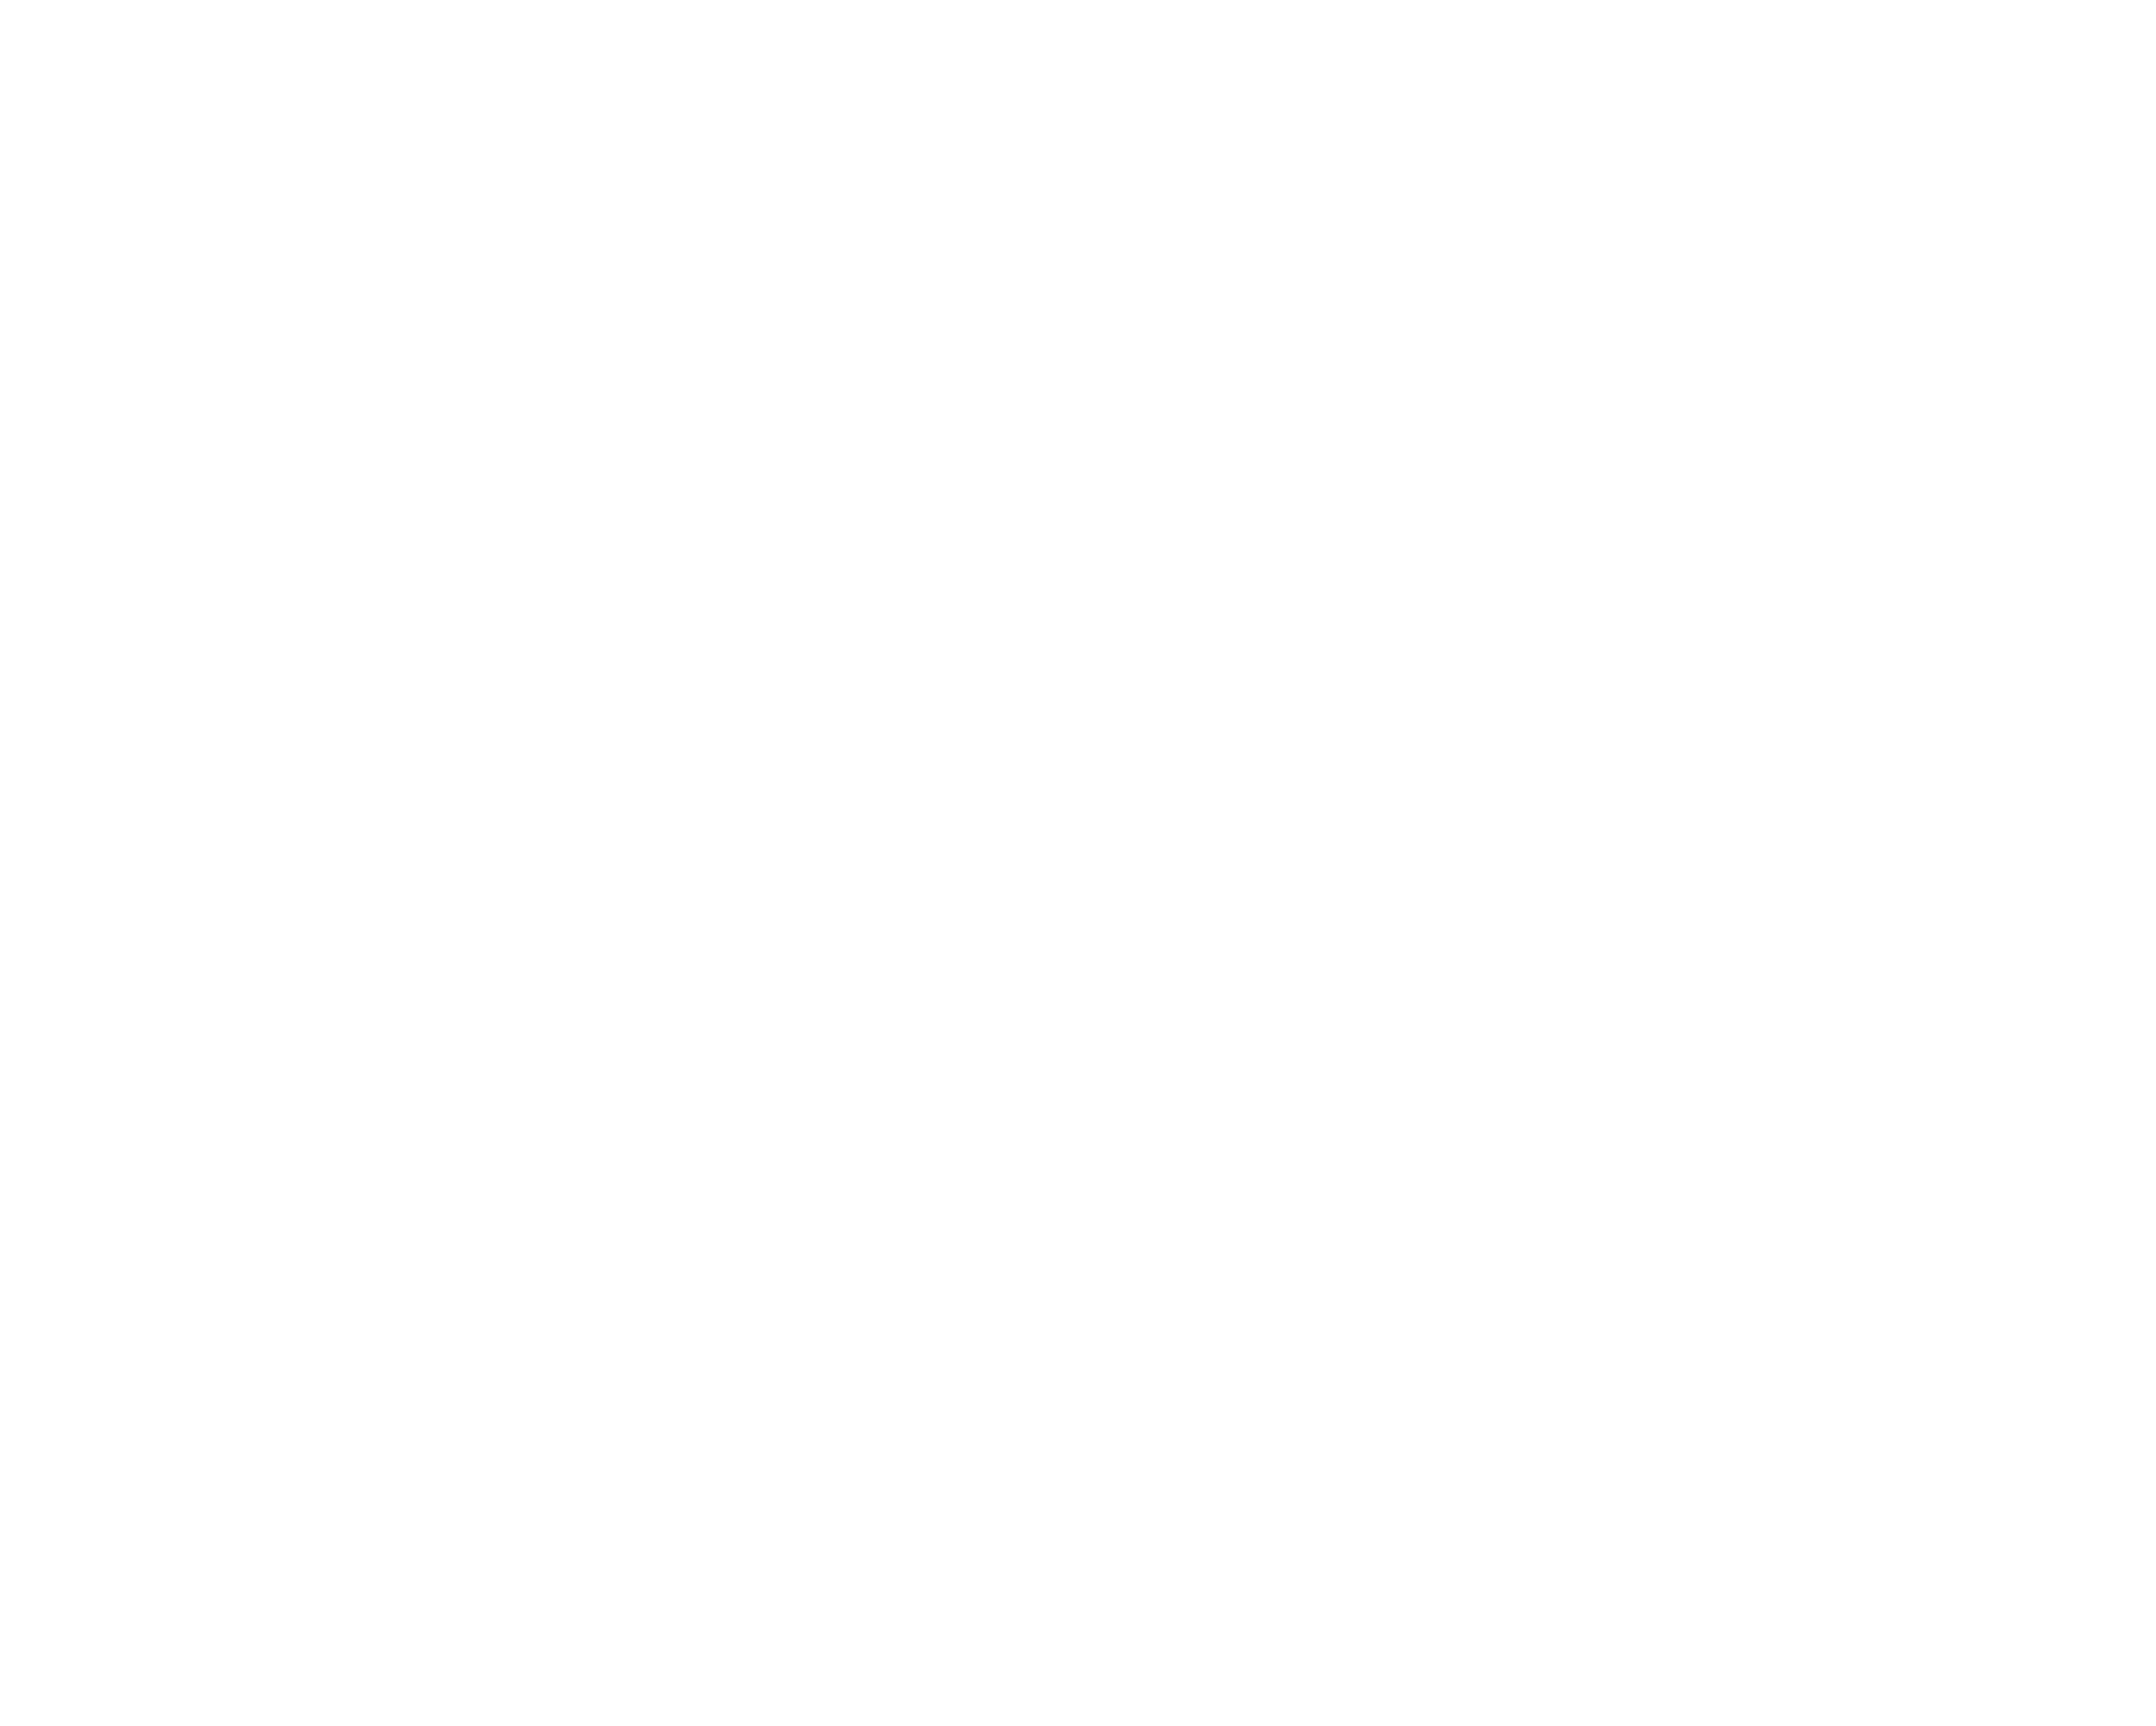

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
files_adjacency = (files_similarity_matrix + 0.3).round().astype('int')
fig = plt.figure(1, figsize=(100, 80),dpi=60)
nx.draw(nx.from_pandas_adjacency(files_adjacency), with_labels=True)

from google.colab import files
